In [ ]:
%pip install diffprivlib

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Create DataFrame X and Series y
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train), columns=X_train.columns
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test), columns=X_test.columns
)

# Display samples
display(X_train_scaled.head())
display(X_test_scaled.head())
 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-1.473937,1.203658,-1.562535,-1.312603
1,-0.133071,2.992376,-1.276006,-1.045633
2,1.085898,0.085709,0.385858,0.289218
3,-1.230143,0.756479,-1.218701,-1.312603
4,-1.717731,0.309299,-1.390618,-1.312603


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.354517,-0.585060,0.557775,0.022248
1,-0.133071,1.650837,-1.161395,-1.179118
2,2.304867,-1.032239,1.818500,1.490583
3,0.232620,-0.361470,0.443164,0.422703
4,1.207795,-0.585060,0.615081,0.289218


In [7]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
standard_model = LogisticRegression()

# Train the model on the scaled training data
standard_model.fit(X_train_scaled, y_train)


LogisticRegression()

In [ ]:

from sklearn.linear_model import LogisticRegression
from diffprivlib.models import LogisticRegression as PrivateLogisticRegression
import numpy as np

private_models = {}
epsilon_values = [0.1, 0.5, 1.0, 5.0, 10.0]

# Calculate L2 norm of the training data
data_norm = np.linalg.norm(X_train_scaled)

# Train differentially private models
for epsilon in epsilon_values:
    private_model = PrivateLogisticRegression(
        epsilon=epsilon, data_norm=data_norm
    )
    private_model.fit(X_train_scaled, y_train)
    private_models[epsilon] = private_model

print("Differentially private models trained successfully.")
 

Differentially private models trained successfully.


In [9]:
from sklearn.metrics import accuracy_score

# Evaluate the standard model
standard_accuracy = standard_model.score(X_test_scaled, y_test)
print(f"Standard model accuracy: {standard_accuracy}")

# Evaluate the DP models
private_accuracies = {}
for epsilon, model in private_models.items():
    accuracy = model.score(X_test_scaled, y_test)
    private_accuracies[epsilon] = accuracy
    print(f"Differentially private model accuracy (epsilon={epsilon}): {accuracy}")


Standard model accuracy: 1.0
Differentially private model accuracy (epsilon=0.1): 0.23333333333333334
Differentially private model accuracy (epsilon=0.5): 0.13333333333333333
Differentially private model accuracy (epsilon=1.0): 0.3333333333333333
Differentially private model accuracy (epsilon=5.0): 0.6
Differentially private model accuracy (epsilon=10.0): 0.6666666666666666


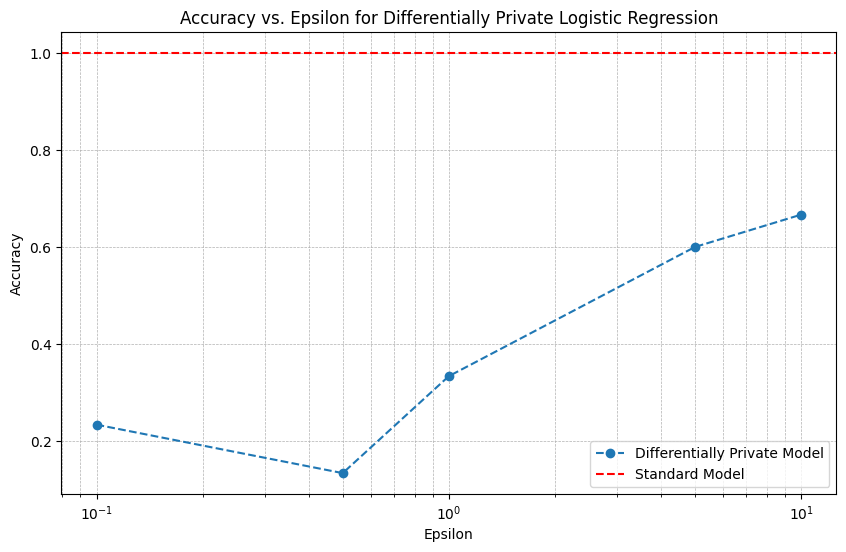

In [10]:
import matplotlib.pyplot as plt

# Sort epsilon for plotting
epsilon_values_sorted = sorted(private_accuracies.keys())
private_accuracies_sorted = [
    private_accuracies[e] for e in epsilon_values_sorted
]

plt.figure(figsize=(10, 6))
plt.plot(
    epsilon_values_sorted, private_accuracies_sorted,
    marker='o', linestyle='--', label='Differentially Private Model'
)
plt.axhline(
    y=standard_accuracy, color='r', linestyle='--', label='Standard Model'
)

plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epsilon for Differentially Private Logistic Regression')
plt.xscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()
